In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from yellowbrick.classifier import ClassificationReport
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
!ls

data1 = pd.read_csv("/content/PROJECT_HEART_DATASET.csv")
data1

PROJECT_HEART_DATASET.csv  sample_data


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160,331,0,0,94,1,2.5,?,?,?,1
290,54,0,3,130,294,0,1,100,1,0.0,2,?,?,1
291,56,1,4,155,342,1,0,150,1,3.0,2,?,?,1
292,58,0,2,180,393,0,0,110,1,1.0,2,?,7,1


In [ ]:
missing_values = ['?',"--"]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.0,0.0,2.0,185.0,0.0,0.0,NaN,NaN,NaN,0
1,29,1,2,120.0,243.0,0.0,0.0,160.0,0.0,0.0,NaN,NaN,NaN,0
2,29,1,2,140.0,NaN,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0
3,30,0,1,170.0,237.0,0.0,1.0,170.0,0.0,0.0,NaN,NaN,6.0,0
4,31,0,2,100.0,219.0,0.0,1.0,150.0,0.0,0.0,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.0,0.0,0.0,94.0,1.0,2.5,NaN,NaN,NaN,1
290,54,0,3,130.0,294.0,0.0,1.0,100.0,1.0,0.0,2.0,NaN,NaN,1
291,56,1,4,155.0,342.0,1.0,0.0,150.0,1.0,3.0,2.0,NaN,NaN,1
292,58,0,2,180.0,393.0,0.0,0.0,110.0,1.0,1.0,2.0,NaN,7.0,1


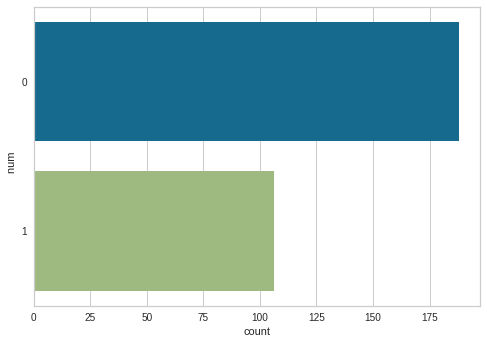

In [ ]:
sns.countplot(y='num    ',data=data)

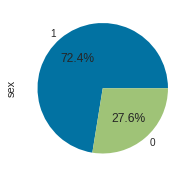

In [ ]:
data.sex.value_counts().plot(kind="pie", autopct='%.1f%%', figsize=(3,3))

In [ ]:
data.columns
data.shape
data.isnull().sum()
data.isnull().sum().sum()

782

In [ ]:
data.fillna(data.mean(),inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.894231,0.0,5.642857,0
1,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857,0
2,29,1,2,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,1.894231,0.0,5.642857,0
3,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.894231,0.0,6.000000,0
4,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.894231,0.0,5.642857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1.894231,0.0,5.642857,1
290,54,0,3,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,2.000000,0.0,5.642857,1
291,56,1,4,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,2.000000,0.0,5.642857,1
292,58,0,2,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,2.000000,0.0,7.000000,1


In [ ]:
x = data.iloc[:,:-1]
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,28,1,2,130.0,132.000000,0.0,2.0,185.0,0.0,0.0,1.894231,0.0,5.642857
1,29,1,2,120.0,243.000000,0.0,0.0,160.0,0.0,0.0,1.894231,0.0,5.642857
2,29,1,2,140.0,250.848708,0.0,0.0,170.0,0.0,0.0,1.894231,0.0,5.642857
3,30,0,1,170.0,237.000000,0.0,1.0,170.0,0.0,0.0,1.894231,0.0,6.000000
4,31,0,2,100.0,219.000000,0.0,1.0,150.0,0.0,0.0,1.894231,0.0,5.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,52,1,4,160.0,331.000000,0.0,0.0,94.0,1.0,2.5,1.894231,0.0,5.642857
290,54,0,3,130.0,294.000000,0.0,1.0,100.0,1.0,0.0,2.000000,0.0,5.642857
291,56,1,4,155.0,342.000000,1.0,0.0,150.0,1.0,3.0,2.000000,0.0,5.642857
292,58,0,2,180.0,393.000000,0.0,0.0,110.0,1.0,1.0,2.000000,0.0,7.000000


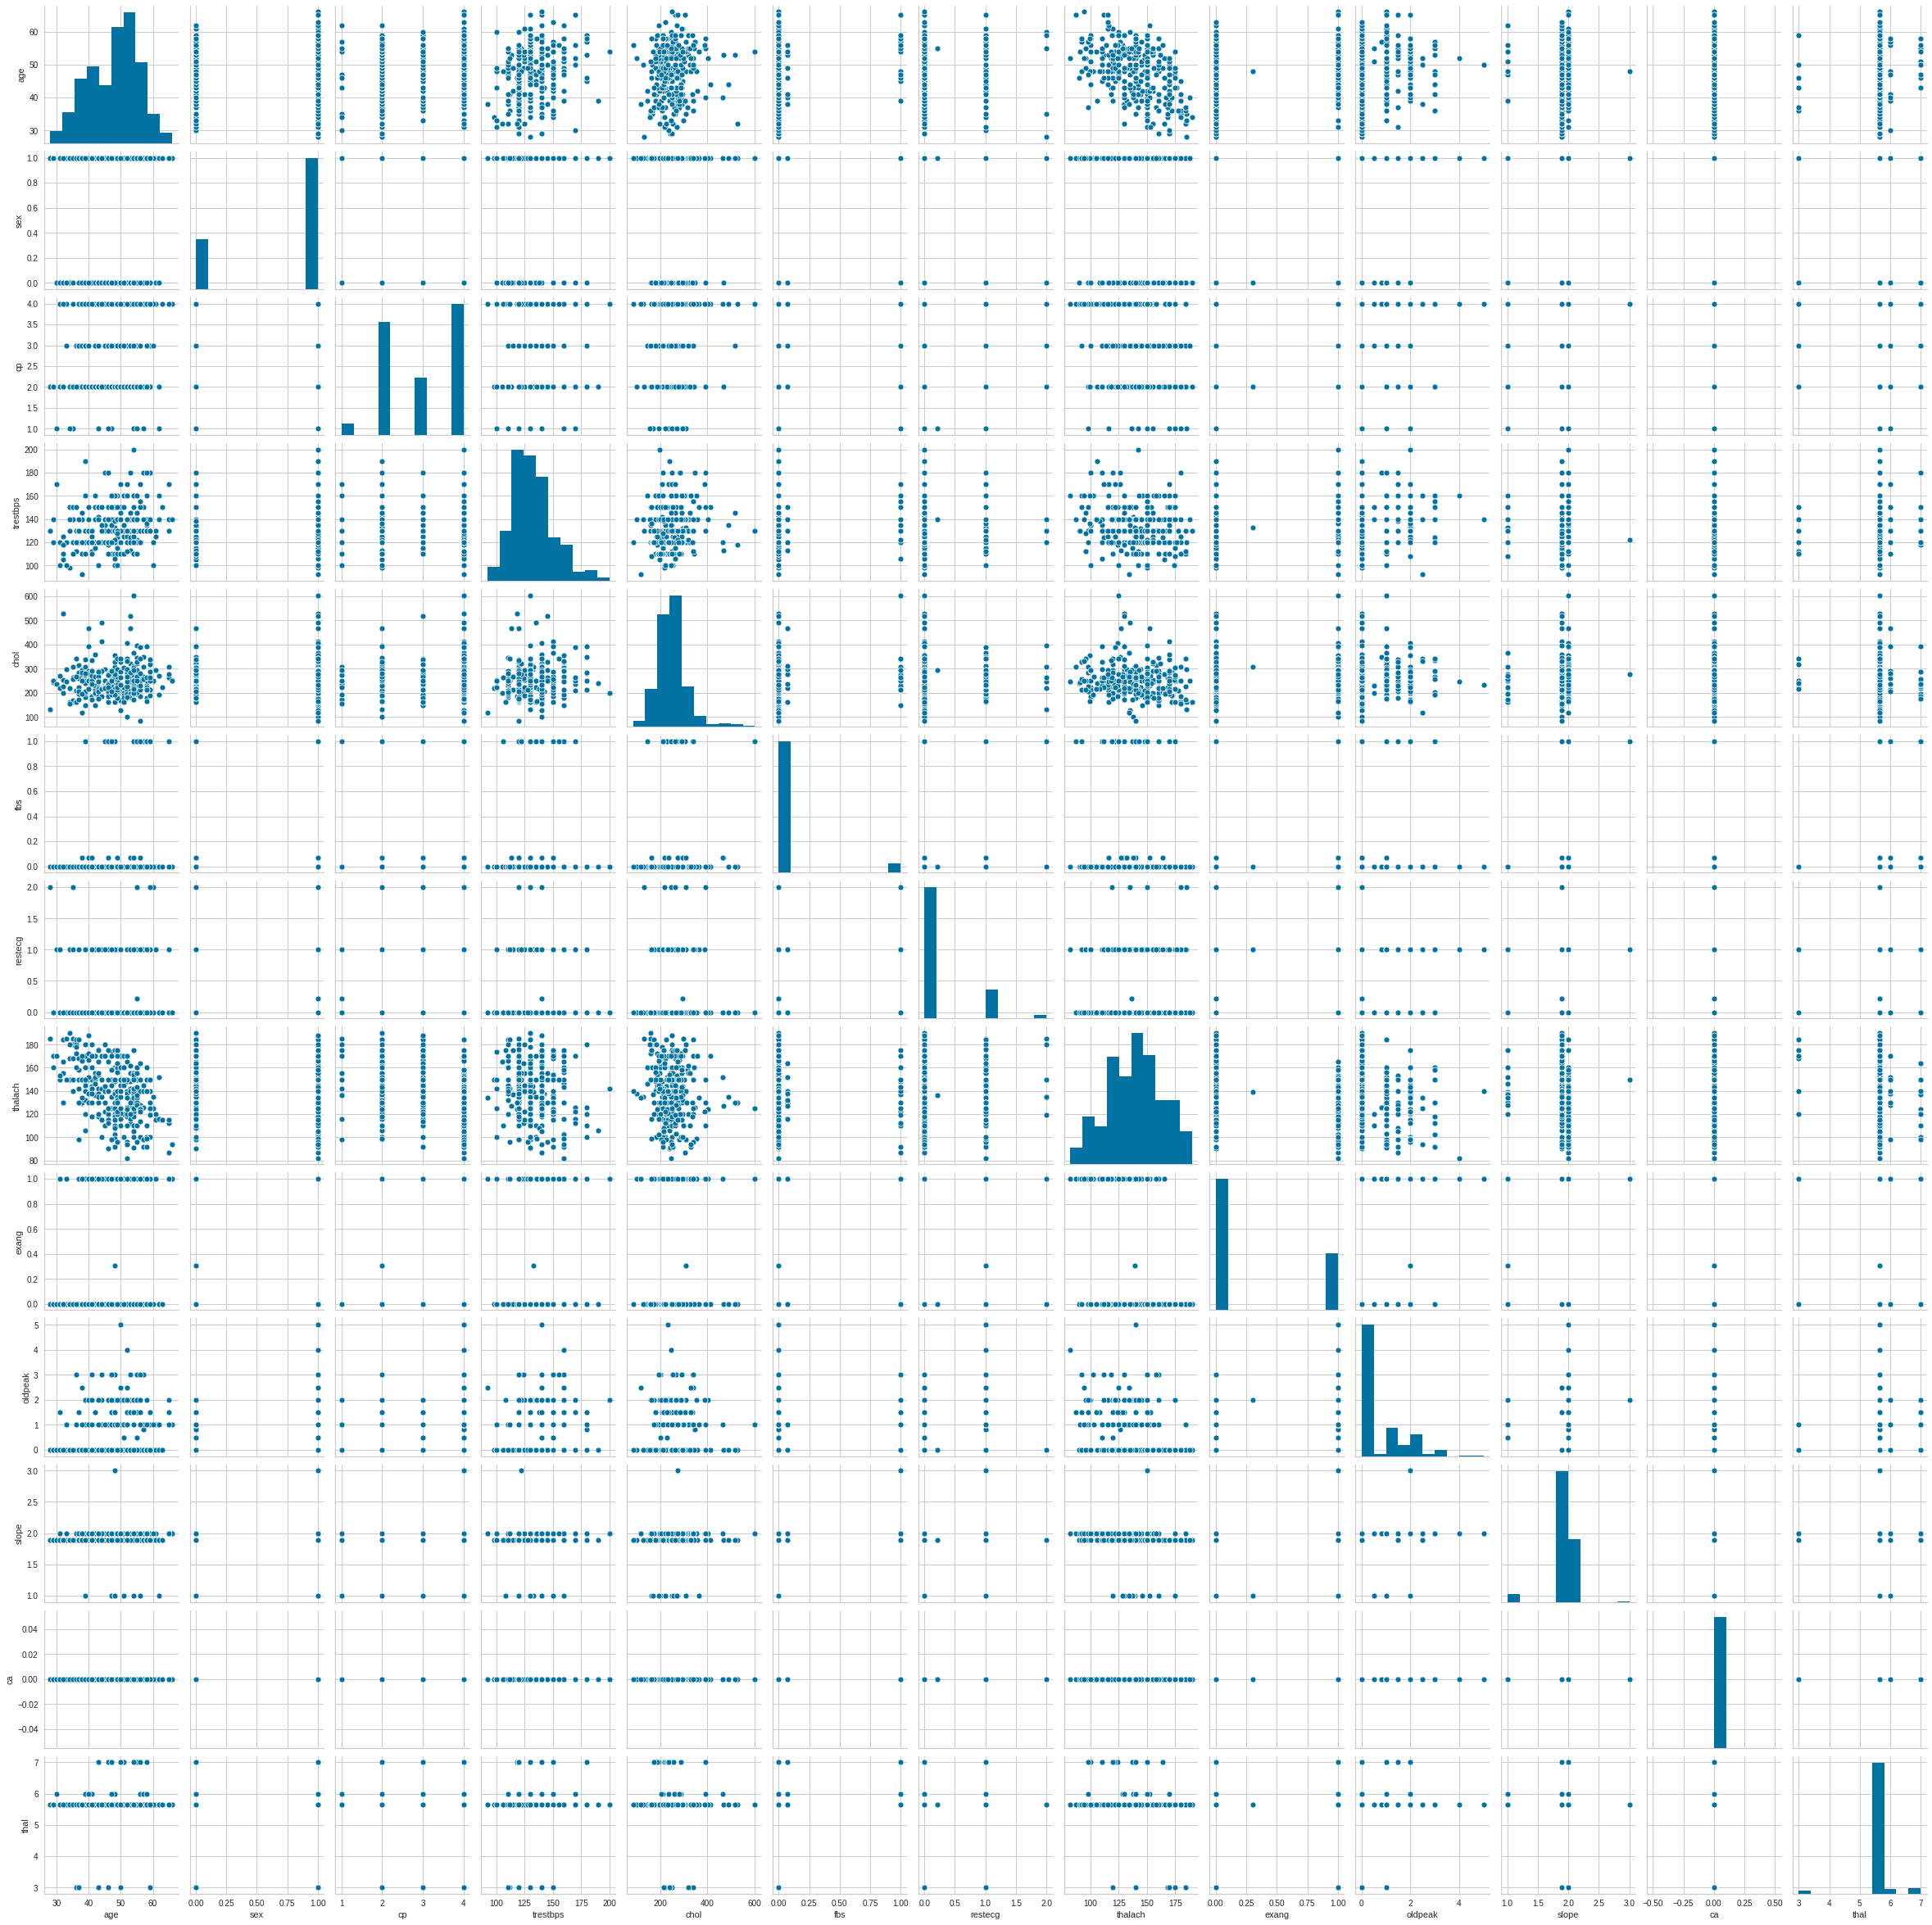

In [ ]:
sns.pairplot(x)

In [ ]:
y = data.iloc[:,13]
y

0      0
1      0
2      0
3      0
4      0
      ..
289    1
290    1
291    1
292    1
293    1
Name: num    , Length: 294, dtype: int64

In [ ]:
label_Encod = LabelEncoder()
x = x.apply(label_Encod.fit_transform)
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,1,1,16,4,0,3,69,0,0,1,0,1
1,1,1,1,11,69,0,0,54,0,0,1,0,1
2,1,1,1,22,76,0,0,61,0,0,1,0,1
3,2,0,0,28,64,0,2,61,0,0,1,0,2
4,3,0,1,2,49,0,2,47,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,24,1,3,27,130,0,0,5,2,6,1,0,1
290,26,0,2,16,113,0,2,9,2,0,2,0,1
291,28,1,3,26,136,2,0,47,2,7,2,0,1
292,30,0,1,29,144,0,0,15,2,3,2,0,3


In [ ]:
standard_scaler = StandardScaler()
X = standard_scaler.fit_transform(x)
X

array([[-2.55027962,  0.61666984, -1.02025916, ..., -0.51334757,
         0.        , -0.19002206],
       [-2.42156165,  0.61666984, -1.02025916, ..., -0.51334757,
         0.        , -0.19002206],
       [-2.42156165,  0.61666984, -1.02025916, ..., -0.51334757,
         0.        , -0.19002206],
       ...,
       [ 1.0538237 ,  0.61666984,  1.05556224, ...,  1.34991398,
         0.        , -0.19002206],
       [ 1.31125965, -1.62161328, -1.02025916, ...,  1.34991398,
         0.        ,  4.27929677],
       [ 2.08356751,  0.61666984,  1.05556224, ...,  1.34991398,
         0.        , -0.19002206]])

In [ ]:
X.shape,y.shape

((294, 13), (294,))

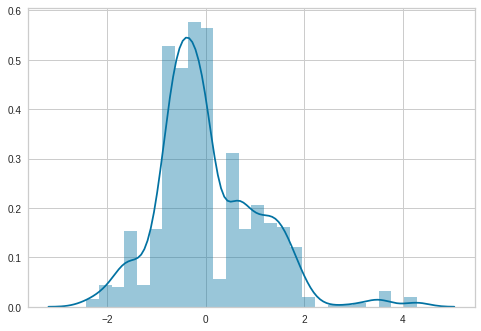

In [ ]:
x_train,x_test,y_train,y_test= train_test_split(X,y,test_size = 0.25,random_state =25)
sns.distplot(x_test)

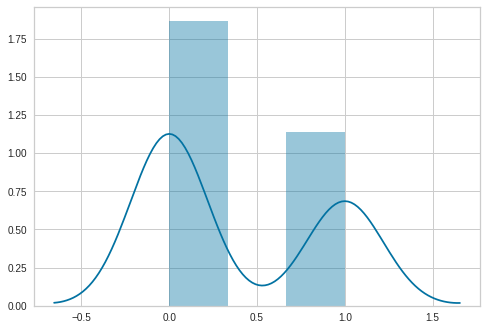

In [ ]:
Logistic_Reg =LogisticRegression()
Result=Logistic_Reg.fit(x_train, y_train)
Result
y_pred = Result.predict(x_test)
y_pred
sns.distplot(y_pred)

In [ ]:
accuracy_score(y_pred,y_test)*100 

83.78378378378379

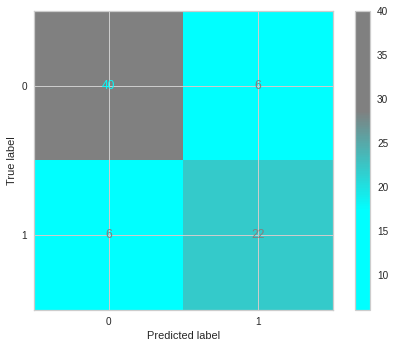

In [ ]:
cm = confusion_matrix(y_pred,y_test)
cm
my_map = matplotlib.colors.LinearSegmentedColormap.from_list("",["cyan",'Cyan',"grey",'grey'])
plot_confusion_matrix(Logistic_Reg,x_test,y_test,cmap=my_map)



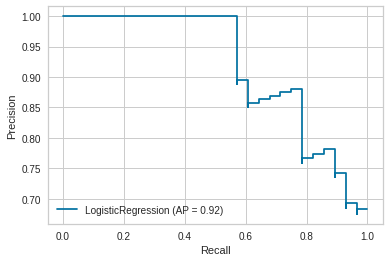

In [ ]:
disp = plot_precision_recall_curve(Logistic_Reg, x_test, y_test)

In [ ]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.87      0.87      0.87        46\n           1       0.79      0.79      0.79        28\n\n    accuracy                           0.84        74\n   macro avg       0.83      0.83      0.83        74\nweighted avg       0.84      0.84      0.84        74\n'

0.8378378378378378

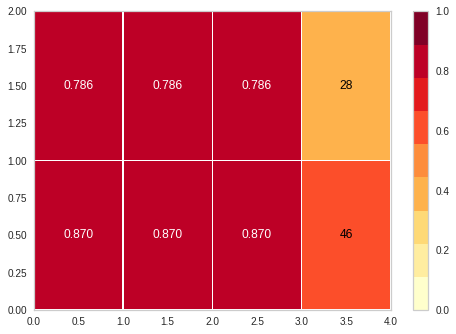

In [ ]:
visualizer = ClassificationReport(Logistic_Reg,support=True) 
visualizer.score(x_test, y_test)

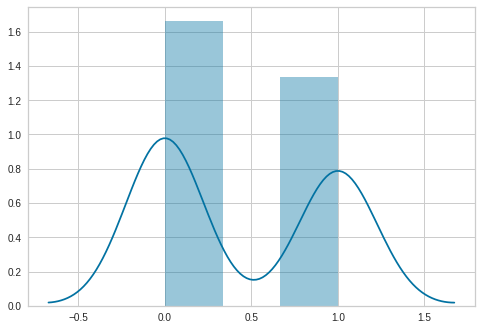

In [ ]:
Decision_tree = DecisionTreeClassifier()
Decision_tree.fit(x_train,y_train)
y_pred =Decision_tree.predict(x_test)
sns.distplot(y_pred)

In [ ]:
accuracy_score(y_pred,y_test)*100

77.02702702702703

In [ ]:
confusion_matrix(y_pred,y_test)

array([[35,  6],
       [11, 22]])

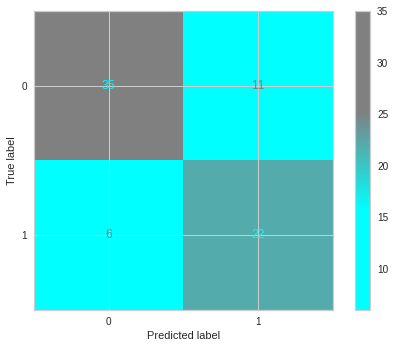

In [ ]:
my_map = matplotlib.colors.LinearSegmentedColormap.from_list("",["cyan",'Cyan',"grey",'grey'])
plot_confusion_matrix(Decision_tree,x_test,y_test,cmap=my_map)

In [ ]:
classification_report(y_pred,y_test)

'              precision    recall  f1-score   support\n\n           0       0.76      0.85      0.80        41\n           1       0.79      0.67      0.72        33\n\n    accuracy                           0.77        74\n   macro avg       0.77      0.76      0.76        74\nweighted avg       0.77      0.77      0.77        74\n'

0.7702702702702703

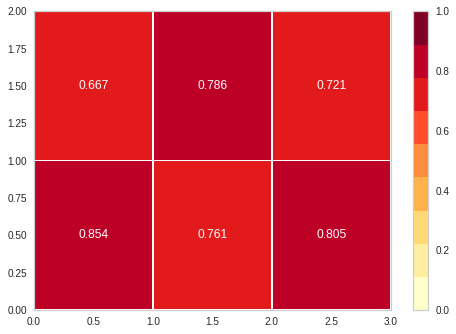

In [ ]:
visualizer =ClassificationReport(Decision_tree)
visualizer.score(x_test, y_test) 

In [ ]:
svcclassifier = SVC(kernel = 'linear', random_state = 1,C = 30,gamma='auto')
svcclassifier.fit(x_train, y_train)
y_pred = svcclassifier.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)*100

83.78378378378379

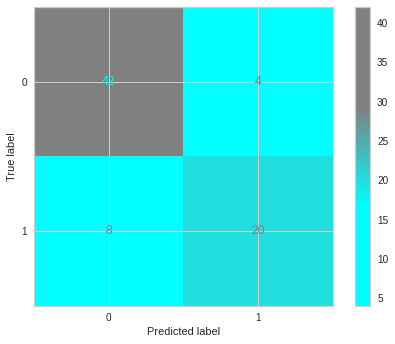

In [ ]:
confusion_matrix(y_pred,y_test)
my_map = matplotlib.colors.LinearSegmentedColormap.from_list("",["cyan",'Cyan',"grey",'grey'])
plot_confusion_matrix(svcclassifier,x_test,y_test,cmap=my_map)

In [ ]:
# 0 	1 	1 	16 	4 	0 	3 	69 	0 	0 	1 	0 	1
Patient_Age = int(input( 'Enter the age:'))
Patient_Gender= int(input('Enter gender(1 for male and 0 for female):'))
Patient_pain= int(input('Chest pain type(1 = typical angina,2 = atypical angina,3 = non — anginal pain,4 = asymptotic):'))
Patient_RBP= int(input('Resting blood pressure:'))
Patient_chol= int(input('Cholesterol level:'))
Patient_FBS= int(input('Fasting blood sugar(1-fasting blood sugar > 120mg/dl, 0-fasting blood sugar < 120mg/dl):'))
Patient_ECG=int(input('Resting ECG(0 = normal,1 = having ST-T wave abnormality,2 = left ventricular hyperthrophy):'))
Patient_thalach= int(input('Max heart rate achieved:'))
Patient_exang= int(input('Exercise induced angina (1-yes,0-no):'))
Patient_oldpeak= float(input('ST depression induced by exercise relative to rest:'))
Patient_slope=int(input('Peak exercise ST segment (1 = upsloping,2 = flat,3 = downsloping):'))
Patient_ca=float(input('Number of major vessels (0–3) colored by flouroscopy:'))
Patient_thal= int(input('Thalassemia(3-normal,6-fixed defect,7-reversible defect):'))




Enter the age:0
Enter gender(1 for male and 0 for female):1
Chest pain type(1 = typical angina,2 = atypical angina,3 = non — anginal pain,4 = asymptotic):1
Resting blood pressure:16
Cholesterol level:4
Fasting blood sugar(1-fasting blood sugar > 120mg/dl, 0-fasting blood sugar < 120mg/dl):0
Resting ECG(0 = normal,1 = having ST-T wave abnormality,2 = left ventricular hyperthrophy):3
Max heart rate achieved:69
Exercise induced angina (1-yes,0-no):0
ST depression induced by exercise relative to rest:0
Peak exercise ST segment (1 = upsloping,2 = flat,3 = downsloping):1
Number of major vessels (0–3) colored by flouroscopy:1
Thalassemia(3-normal,6-fixed defect,7-reversible defect):1


In [ ]:
Patient_Data = [Patient_Age,Patient_Gender,Patient_pain,Patient_RBP,Patient_chol,Patient_FBS,Patient_ECG,Patient_thalach,Patient_exang,Patient_oldpeak,Patient_slope,Patient_ca,Patient_thal]
Patient_Data_New= pd.DataFrame([Patient_Data],columns=['Age','Gender','cp','restbps','chol','FBS','restecg','thalach','exang','oldpeak','slope','ca', 'thal'])
Patient_Data_New

,Age,Gender,cp,restbps,chol,FBS,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0,1,1,16,4,0,3,69,0,0.0,1,1.0,1


In [ ]:
Patient= Logistic_Reg.predict(Patient_Data_New)
Patient
print (Patient)
if Patient>0:
  print ('This patient has a chance to get heart attack')
else:
  print ('This patient does not have a chance to get heart attack')


[1]
This patient has a chance to get heart attack


In [ ]:
Patient= Decision_tree.predict(Patient_Data_New)
Patient
print (Patient)
if Patient>0:
  print ('This patient has a chance to get heart attack')
else:
  print ('This patient does not have a chance to get heart attack')



[0]
This patient does not have a chance to get heart attack


In [ ]:
Patient= svcclassifier.predict(Patient_Data_New)
Patient
print (Patient)
if Patient>0:
  print ('This patient has a chance to get heart attack')
else:
  print ('This patient does not have a chance to get heart attack')

[1]
This patient has a chance to get heart attack
